In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
%matplotlib inline
import seaborn as sns; sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
import warnings
warnings.filterwarnings('ignore')
import osmnx as ox

In [8]:
#read in oradell labels
labels = gpd.read_file('data/processed-labels/labels_all_oradell/labels_all_oradell.shp')

In [9]:
labels

,audit_task,label_id,gsv_panora,label_type,severity,correct,high_quali,gsv_pano_1,zoom,heading,pitch,photograph,photogra_1,user_id,lat,lng,geometry
0,7,9,8AsY4nlOJQAo8P5YYaEjzA,CurbRamp,1.0,1,1,8AsY4nlOJQAo8P5YYaEjzA,2,309.035706,-15.723214,108.536644,-0.496017,503d2482-420f-454e-8118-aac2d22592aa,40.945518,-74.034111,POINT (-74.03411 40.94552)
1,7,10,8AsY4nlOJQAo8P5YYaEjzA,NoSidewalk,5.0,1,1,8AsY4nlOJQAo8P5YYaEjzA,2,303.232147,-13.580358,108.536644,-0.496017,503d2482-420f-454e-8118-aac2d22592aa,40.945541,-74.034142,POINT (-74.03414 40.94554)
2,7,11,8AsY4nlOJQAo8P5YYaEjzA,CurbRamp,1.0,1,1,8AsY4nlOJQAo8P5YYaEjzA,2,266.714294,-12.330358,108.536644,-0.496017,503d2482-420f-454e-8118-aac2d22592aa,40.945435,-74.034157,POINT (-74.03416 40.94543)
3,7,12,8AsY4nlOJQAo8P5YYaEjzA,NoSidewalk,5.0,1,1,8AsY4nlOJQAo8P5YYaEjzA,2,270.821442,-11.616072,108.536644,-0.496017,503d2482-420f-454e-8118-aac2d22592aa,40.945446,-74.034203,POINT (-74.03420 40.94545)
4,7,13,8AsY4nlOJQAo8P5YYaEjzA,Crosswalk,1.0,1,1,8AsY4nlOJQAo8P5YYaEjzA,2,284.392853,-13.758928,108.536644,-0.496017,503d2482-420f-454e-8118-aac2d22592aa,40.945473,-74.034142,POINT (-74.03414 40.94547)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12129,2194,13096,28tGbhCsMyFUsKRs7-jp_A,NoCurbRamp,2.0,1,1,28tGbhCsMyFUsKRs7-jp_A,2,189.401779,-10.892858,287.290100,-2.176155,528eb1d6-e20e-4fb9-81c9-0c06b9e2852f,40.954376,-74.030624,POINT (-74.03062 40.95438)
12130,2194,13097,28tGbhCsMyFUsKRs7-jp_A,Obstacle,4.0,None,1,28tGbhCsMyFUsKRs7-jp_A,2,189.401779,-10.892858,287.290100,-2.176155,528eb1d6-e20e-4fb9-81c9-0c06b9e2852f,40.954391,-74.030617,POINT (-74.03062 40.95439)
12131,2194,13098,5zDLTjYdw6hQhfsXppE0cA,SurfaceProblem,1.0,1,1,5zDLTjYdw6hQhfsXppE0cA,2,77.437500,-23.928572,287.278870,-2.803400,528eb1d6-e20e-4fb9-81c9-0c06b9e2852f,40.954624,-74.030891,POINT (-74.03089 40.95462)
12132,2202,13099,WkdNrR64GZUC1V_at1pxyA,NoCurbRamp,NaN,None,0,WkdNrR64GZUC1V_at1pxyA,1,178.687500,-8.625000,281.559601,-2.859410,0cfe6980-35ac-4cdd-a2df-cbee02531406,40.969189,-74.029976,POINT (-74.02998 40.96919)


In [10]:
sidewalk = gpd.read_file('data/oradell-osm-roads/oradell-osm-roads-full.shp')
sidewalk

,highway,osmid,geometry
0,service,11565015,"LINESTRING (-74.02942 40.95394, -74.02942 40.9..."
1,service,11565015,"LINESTRING (-74.02988 40.95400, -74.02988 40.9..."
2,footway,845525905,"LINESTRING (-74.03794 40.95856, -74.03763 40.9..."
3,footway,845525905,"LINESTRING (-74.03763 40.95920, -74.03794 40.9..."
4,footway,845525905,"LINESTRING (-74.03763 40.95920, -74.03790 40.9..."
...,...,...,...
1825,primary,1027007129,"LINESTRING (-74.02582 40.94882, -74.02580 40.9..."
1826,primary,1027007129,"LINESTRING (-74.03218 40.95121, -74.03216 40.9..."
1827,primary,1027007129,"LINESTRING (-74.02885 40.94212, -74.02929 40.9..."
1828,primary,1027007129,"LINESTRING (-74.03680 40.95124, -74.03641 40.9..."


In [11]:
#Match coordinates
sidewalk = sidewalk.to_crs("EPSG:2285")
labels = labels.to_crs("EPSG:2285")

In [12]:
#Spatial join project sidewalk labels to sidewalk geometry
labels_mapped_on_sidewalk = labels.sjoin_nearest(sidewalk, distance_col='distance')
labels_mapped_on_sidewalk

,audit_task,label_id,gsv_panora,label_type,severity,correct,high_quali,gsv_pano_1,zoom,heading,pitch,photograph,photogra_1,user_id,lat,lng,geometry,index_right,highway,osmid,distance
0,7,9,8AsY4nlOJQAo8P5YYaEjzA,CurbRamp,1.0,1,1,8AsY4nlOJQAo8P5YYaEjzA,2,309.035706,-15.723214,108.536644,-0.496017,503d2482-420f-454e-8118-aac2d22592aa,40.945518,-74.034111,POINT (13877617.381 1626395.323),1375,residential,11566869,8.785378
1,7,10,8AsY4nlOJQAo8P5YYaEjzA,NoSidewalk,5.0,1,1,8AsY4nlOJQAo8P5YYaEjzA,2,303.232147,-13.580358,108.536644,-0.496017,503d2482-420f-454e-8118-aac2d22592aa,40.945541,-74.034142,POINT (13877605.610 1626397.365),1375,residential,11566869,13.819353
3,7,12,8AsY4nlOJQAo8P5YYaEjzA,NoSidewalk,5.0,1,1,8AsY4nlOJQAo8P5YYaEjzA,2,270.821442,-11.616072,108.536644,-0.496017,503d2482-420f-454e-8118-aac2d22592aa,40.945446,-74.034203,POINT (13877611.668 1626358.930),1375,residential,11566869,24.869158
4,7,13,8AsY4nlOJQAo8P5YYaEjzA,Crosswalk,1.0,1,1,8AsY4nlOJQAo8P5YYaEjzA,2,284.392853,-13.758928,108.536644,-0.496017,503d2482-420f-454e-8118-aac2d22592aa,40.945473,-74.034142,POINT (13877620.010 1626376.680),1375,residential,11566869,9.900008
23,7,34,7gUjKaABQ1OO0_nHdEIiUg,NoSidewalk,5.0,1,1,7gUjKaABQ1OO0_nHdEIiUg,1,281.687500,-3.660714,289.336060,-2.632355,503d2482-420f-454e-8118-aac2d22592aa,40.945621,-74.034348,POINT (13877541.755 1626388.743),1375,residential,11566869,22.102828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12049,2074,12904,M0J8eBxaW91HtC_pMPd_0g,Obstacle,4.0,None,0,M0J8eBxaW91HtC_pMPd_0g,1,82.625000,-35.000000,281.734467,-2.858710,9a4c42c5-0eaf-4869-9a52-7cffd6ae93f9,40.954243,-74.031105,POINT (13876474.323 1629501.484),343,footway,665586762,8.693448
12124,2194,13091,Vt97GiZnUV_5dfj6ZRhBvA,Crosswalk,2.0,None,1,Vt97GiZnUV_5dfj6ZRhBvA,2,313.330353,-17.410715,287.855011,-3.234470,528eb1d6-e20e-4fb9-81c9-0c06b9e2852f,40.954552,-74.030518,POINT (13876543.688 1629687.972),327,service,665586748,1.322006
12124,2194,13091,Vt97GiZnUV_5dfj6ZRhBvA,Crosswalk,2.0,None,1,Vt97GiZnUV_5dfj6ZRhBvA,2,313.330353,-17.410715,287.855011,-3.234470,528eb1d6-e20e-4fb9-81c9-0c06b9e2852f,40.954552,-74.030518,POINT (13876543.688 1629687.972),325,service,665586748,1.322006
12124,2194,13091,Vt97GiZnUV_5dfj6ZRhBvA,Crosswalk,2.0,None,1,Vt97GiZnUV_5dfj6ZRhBvA,2,313.330353,-17.410715,287.855011,-3.234470,528eb1d6-e20e-4fb9-81c9-0c06b9e2852f,40.954552,-74.030518,POINT (13876543.688 1629687.972),326,service,665586749,1.322006


In [13]:
#select only label_id, distance
distance = labels_mapped_on_sidewalk[['label_id', 'distance']]

In [14]:
#drop duplicates
distance = distance.drop_duplicates()

In [15]:
# reset index
distance = distance.reset_index(drop=True)

In [16]:
distance

,label_id,distance
0,9,8.785378
1,10,13.819353
2,12,24.869158
3,13,9.900008
4,34,22.102828
...,...,...
12129,12570,22.910906
12130,12571,13.973563
12131,12807,27.713600
12132,12904,8.693448


<AxesSubplot: xlabel='distance', ylabel='Count'>

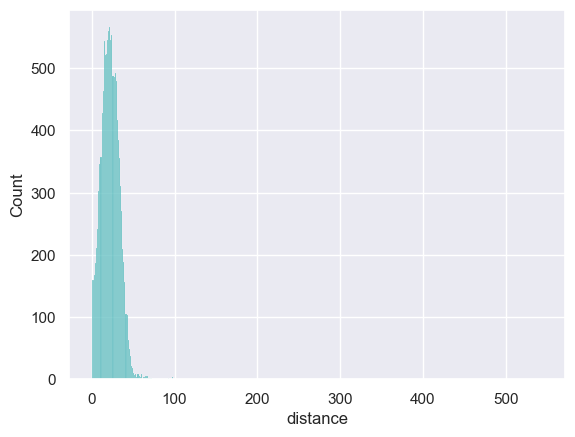

In [17]:
sns.histplot(data=distance, x="distance", color="#47B5B7")

In [18]:
# get the 95th percentile of the distance
distance_threshold = distance['distance'].quantile(0.95)
distance_threshold

39.85265036337225

<AxesSubplot: xlabel='distance', ylabel='Count'>

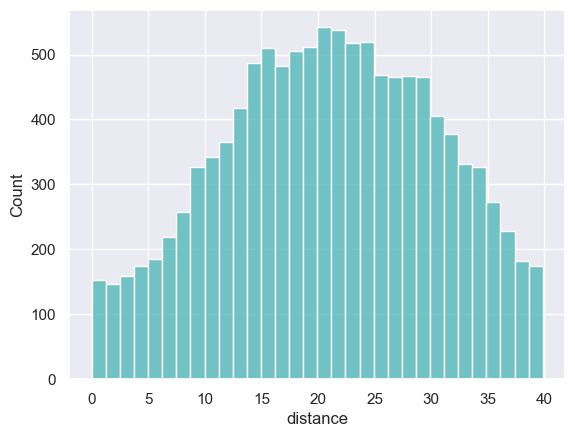

In [19]:
#plot only the labels that are within the 95th percentile
sns.histplot(data=distance[distance['distance'] < distance_threshold], x="distance", color="#47B5B7")


In [20]:
#calulate the 50%, 60%, 70% 80%, 90% percentile of the distance
distance_50 = labels_mapped_on_sidewalk['distance'].quantile(0.5)
distance_60 = labels_mapped_on_sidewalk['distance'].quantile(0.6)
distance_70 = labels_mapped_on_sidewalk['distance'].quantile(0.7)
distance_75 = labels_mapped_on_sidewalk['distance'].quantile(0.75)
distance_80 = labels_mapped_on_sidewalk['distance'].quantile(0.8)

Text(31.451849904069963, 0, '80%')

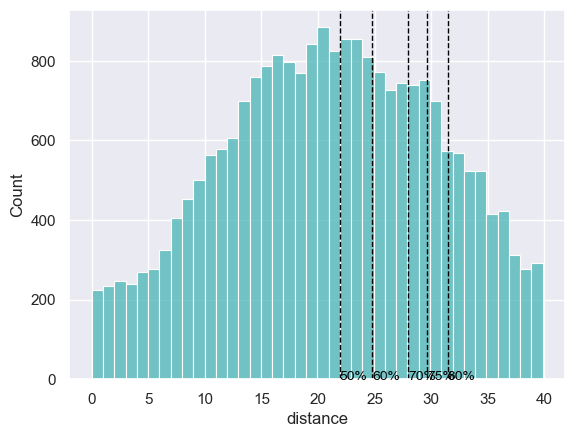

In [21]:
#calulate the 60%, 70%, 80%, 90% percentile of the distance and plot them as lines on the histogram
sns.histplot(data=labels_mapped_on_sidewalk[labels_mapped_on_sidewalk['distance'] < distance_threshold], x="distance", color="#47B5B7")
plt.axvline(distance_50, color='black', linestyle='dashed', linewidth=1)
plt.axvline(distance_60, color='black', linestyle='dashed', linewidth=1)
plt.axvline(distance_70, color='black', linestyle='dashed', linewidth=1)
plt.axvline(distance_75, color='black', linestyle='dashed', linewidth=1)
plt.axvline(distance_80, color='black', linestyle='dashed', linewidth=1)
# add x labels for the lines
plt.text(distance_50, 0, '50%', color='black', fontsize=10)
plt.text(distance_60, 0, '60%', color='black', fontsize=10)
plt.text(distance_70, 0, '70%', color='black', fontsize=10)
plt.text(distance_75, 0, '75%', color='black', fontsize=10)
plt.text(distance_80, 0, '80%', color='black', fontsize=10)



In [22]:
# save distance into a csv file
distance.to_csv('data/features/distance.csv', index=False)

In [27]:
#select the labels with distance > 35
labels_mapped_on_sidewalk[labels_mapped_on_sidewalk['distance'] > 50].explore(tiles='cartodbpositron', column = "label_type")